# IPL 2022 Capstone Project

In [2]:
# loading the libraries and dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
# Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
# SIZE OF ROWS AND COLUMNS OF THE DATASET

print(f"your rows are  {df.shape[0]}  and your columns are  {df.shape[1]}")

your rows are  74  and your columns are  20


In [6]:
df.isnull().sum()          # all false are 0 and all true are 1 , sum will be according to 1 and 0 , 0 means no null value , any number means no of null value

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

1. Which team won the most matches?

In [9]:
match = df['match_winner'].value_counts()   # give a series 
match

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match win by teams')

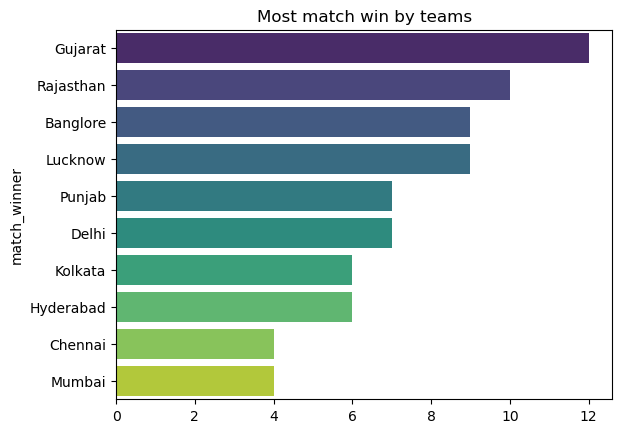

In [12]:
sns.barplot(y = match.index , x = match.values, palette = 'viridis')
plt.title("Most match win by teams")

2. Toss Decision Trends

Text(0.5, 1.0, 'Toss Decision Trends')

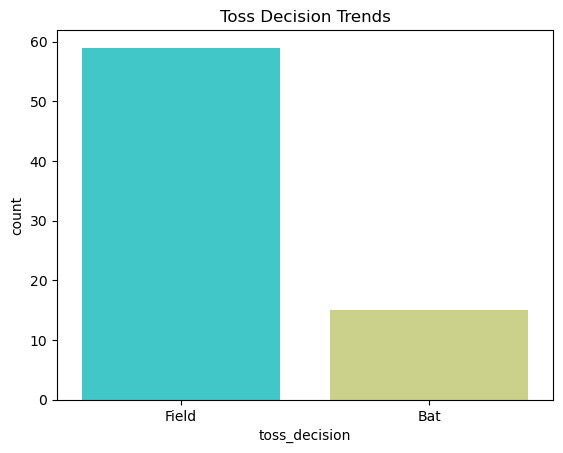

In [15]:
sns.countplot(x = df['toss_decision'] , palette = 'rainbow')
plt.title("Toss Decision Trends")

3. Toss winner vs Match winner

In [18]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won By')

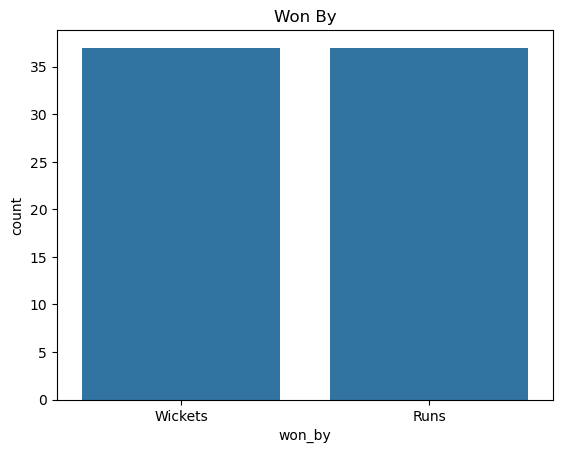

In [22]:
sns.countplot(x = df['won_by'])
plt.title("Won By")

# Key Player Performances

1. Most "Player of the Match" Awards

In [24]:
count = df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 players win man of the match')

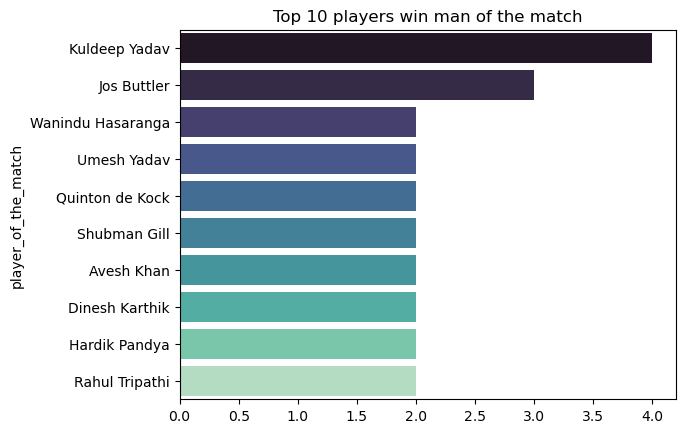

In [27]:
sns.barplot(x = count.values , y = count.index , palette = 'mako')
plt.title("Top 10 players win man of the match")

2. top scorers

In [33]:
# when we have to work with two or more columns we use group by

high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(25)
high

top_scorer
Jos Buttler         651
Quinton de Kock     377
KL Rahul            351
Shubman Gill        288
Faf du Plessis      257
Liam Livingstone    239
David Warner        213
W. Saha             190
Ishan Kishan        180
Shikhar Dhawan      158
Hardik Pandya       154
Mitchell Marsh      152
Rahul Tripathi      147
Devon Conway        143
Virat Kohli         131
Abhishek Sharma     122
Andre Russell       119
Deepak Hooda        114
Rajat Patidar       112
Ruturaj Gaikwad      99
Shivam Dube          95
David Miller         94
Moeen Ali            93
MS Dhoni             86
Yashasvi Jaiswal     68
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

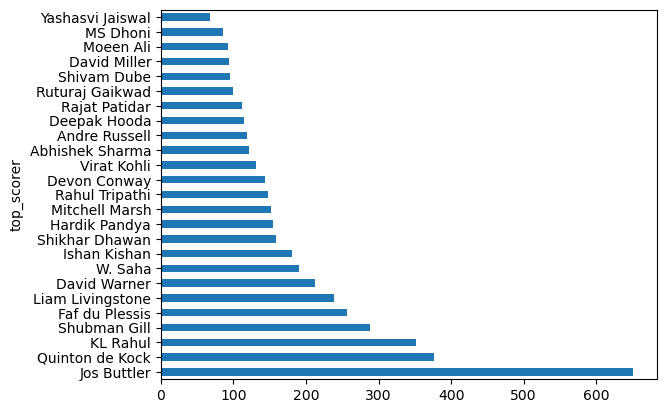

In [35]:
high.plot(kind = 'barh')

3. 10 Best Bowling Figures

In [38]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [42]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending = False).head(20)
top_bowlers

best_bowling
Yuzvendra Chahal      17
Jasprit Bumrah        11
Kuldeep Yadav         11
Rashid Khan           11
Josh Hazlewood        10
Kagiso Rabada         10
Avesh Khan            10
Umran Malik            9
Wanindu Hasaranga      9
T Natarajan            8
Maheesh Theekshana     7
Mohsin Khan            7
Lockie Ferguson        7
Andre Russell          7
Daniel Sams            7
Harshal Patel          6
Dwayne Bravo           6
Prasidh Krishna        6
Mohammed Shami         5
Shardul Takur          4
Name: highest_wickets, dtype: int64

<Axes: ylabel='best_bowling'>

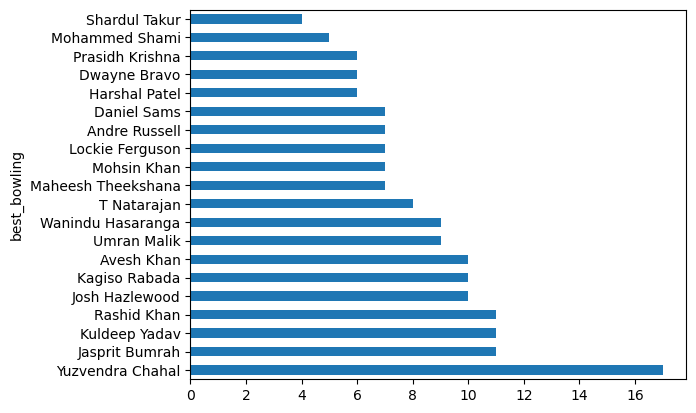

In [43]:
top_bowlers.plot(kind = 'barh')

Venue Analysis

Most Matches played by venue

In [45]:
venue_count = df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

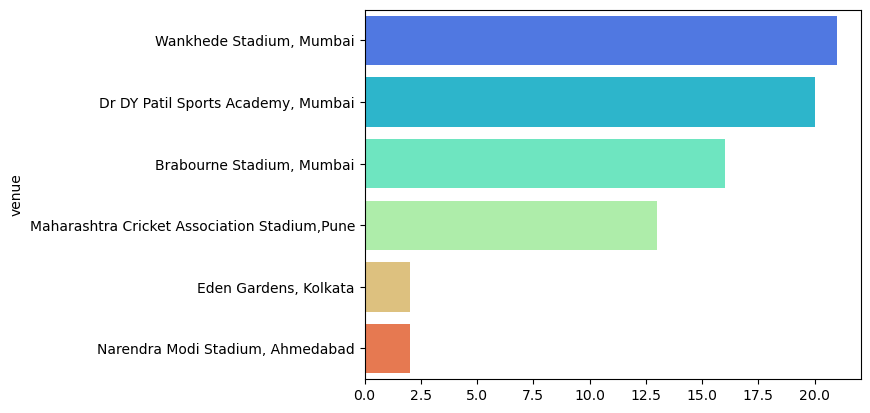

In [47]:
sns.barplot(x = venue_count.values , y = venue_count.index, palette = 'rainbow')

# Custom Questions and insights
1. who won the highest margin by runs?

In [53]:
df[df['won_by'] == 'Runs'].sort_values(by = 'margin' , ascending = False).head(1)[['match_winner' , 'margin']]

,match_winner,margin
54,Chennai,91


2. which player had the highest individual score?

In [54]:
df[df['highscore'] == df['highscore'].max()][['top_scorer' , 'highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


3. which bowler has the best bowling figures? 

In [55]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling', 'best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
